In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [34]:
iris=load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris_df["Species"]=iris.target

In [40]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [41]:
X=iris_df.drop(["Species"],axis=1)
y=iris_df["Species"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (105, 4)
The dimension of X_test is (45, 4)


In [43]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(" MSE :",mse)
print("RMSE :",mse**(1/2.0))
print("RMSE :",np.sqrt(mse))

R-squared Train  : 1.0
R-squared Test  : 0.9777777777777777
 MSE : 0.022222222222222223
RMSE : 0.14907119849998599
RMSE : 0.14907119849998599


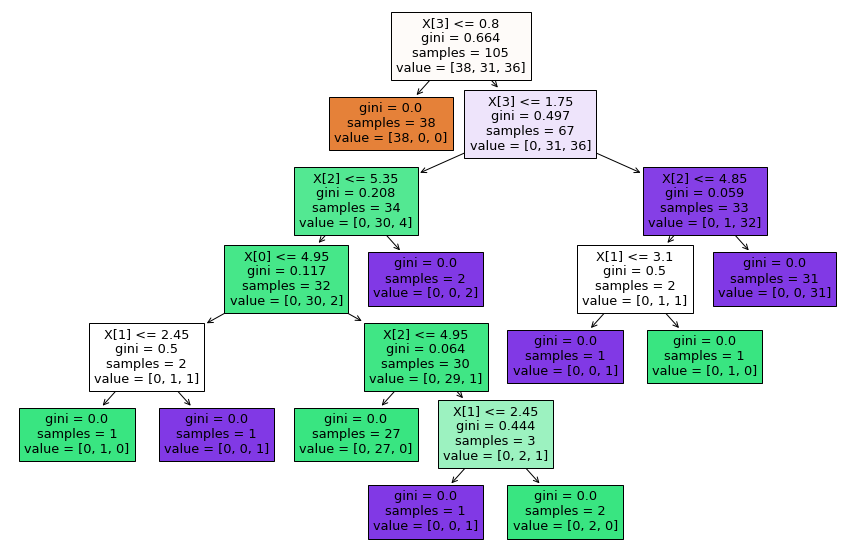

In [44]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier,filled=True)
plt.show()